# Transfer learning

## Sử dụng pre-trained model để dự đoán
 - Load images to predict
 - Transform on images
 - Image to model
 

### Load pretrained model

In [8]:
import torch

In [2]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Mọi người thấy hầu hết các model phổ biến như `resnet`, `densenet` đều được được `implement` sẵn trong `torchvision`. Ở phần này mình sẽ dùng` pretrained resnet model` để dự đoán.

Từ `torchvision.models` mình có thể load các `model`, ví dụ mình dùng `resnet50`. Ở trong có tham số `pretrained = True`, ý là mình dùng `pretrained model resnet50` với `weight` được `train` với bộ dữ liệu `ImageNet`. Còn nếu `pretrained = False`, thì mình sẽ dùng `resnet50 model` với `weight` được khởi tạo ngẫu nhiên.



In [3]:
resnet = models.resnet50(pretrained=True)

/home/toan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/toan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/toan/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [4]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Image Transformation
Khi đã load xong `model`, mình cần `transform` ảnh `input` cho giống với các thuộc tính của ảnh trong bộ `ImageNet` mà trước mình dùng để train model `resnet50` như:
 - Resize to 224x224
 - Normalize image by mean and standard deviation of ImageNet dataset
 - Convert to tensor to pass into model

In [5]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

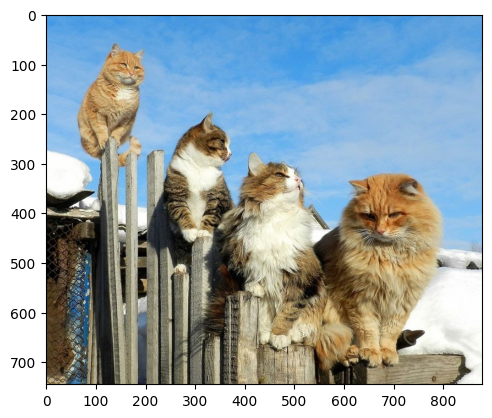

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('data/meo-3-1513734492.jpg')
plt.imshow(img)

In [9]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

### Prediction

In [10]:
resnet.eval()
out = resnet(batch_t)
out.argmax()

tensor(281)

## Fineturn model
Phần này mình sẽ hướng dẫn fine tune pretrained model resnet50 cho dữ liệu cifar100.

### Dataset
Dữ liệu CIFAR-100 bao gồm 60000 hình ảnh màu (50000 ảnh tập train và 10000 ảnh tập test) có kích thước 32 × 32 pixel. Dữ liệu được chia thành 100 lớp.

### Data Augmentation
Vì mình dùng resnet pretrained model với bộ dữ liệu ImageNet, nên mình sẽ transform ảnh về kích thước 224 * 224 cho giống với ảnh trong dữ liệu ImageNet.

In [11]:
train_transform = transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

Tiếp đó mình dùng một số kĩ thuật để `augumentation` ảnh để tránh `overfitting` như xoay ảnh, lật ảnh ngẫu nhiên. Và cuối cùng mình `normalize` ảnh về `standard normal distribution` theo `mean` và `standard deviation` của bộ dữ liệu `ImageNet`.

### Transfer Learning
Đầu tiên mình cần load pretrained model resnet50

In [12]:
resnet50 = models.resnet50(pretrained=True)

/home/toan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/toan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Mình sẽ `freeze` các `parameter` trong `model resnet50`, `freeze` ở đây ý là không `update` hệ số `W` và `b` trong quá trình thực hiện `gradient descent`.

In [13]:
# Freeze model parameters
for param in resnet50.parameters():
    param.requires_grad = False

Tiếp đó mình sẽ thêm các lớp mới của mình vào sau resnet50

In [16]:
import torch.nn as nn
fc_add = resnet50.fc.in_features

resnet50.fc = nn.Sequential(
    nn.Linear(fc_add, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 100), # Since 100 possible outputs
    nn.LogSoftmax(dim=1)
)

Mình sẽ cho output của `resnet50 model` lần lượt qua lớp `Dense (256)`, rồi `Dense (100)`, vì bài này mình làm bài toán phân loại 100 lớp. Sau đó dùng `softmax activation` ở `output layer`. Ở giữa 2 lớp `Dense` mình để 1 lớp Dropout để giảm `overfitting` của mô hình.

### Learning rate schedule
Khi train model, xu hướng là càng về các epoch sau thì giảm learning rate sẽ dễ hội tụ hơn. Trong bài này mình có dùng MultiStepLR để giảm learning rate theo epoch.

In [20]:
optimizer = torch.optim.Adam(resnet50.parameters(), lr=5e-3)
scheduler = torch.optim.lr_scheduler.MultiStepLR(
        optimizer=optimizer,
        milestones=[10, 20],
        gamma=0.1
    )

In [21]:
from torchvision import datasets
data_path = 'data'
train_data = datasets.CIFAR10(data_path, train=True, download=False, transform=train_transform)
test_data = datasets.CIFAR10(data_path, train=False, download=False, transform=train_transform)

In [23]:
from torch.utils.data import DataLoader

# batch size
bs = 32
train_data_loader = DataLoader(train_data, batch_size=bs, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=bs, shuffle=True)

In [24]:

train_data_size = len(train_data)
test_data_size = len(test_data)
     

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [26]:

# Load pretrained ResNet50 Model
resnet50 = models.resnet50(pretrained=True)
resnet50 = resnet50.to(device)

/home/toan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/toan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:

print(type(test_data))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [28]:

# Freeze layers 1-6 in total 10 layers of Resnet50
ct = 0
for child in resnet50.children():
  ct += 1
  if ct < 7:
      for param in child.parameters():
          param.requires_grad = False

In [29]:
# Change the final layer of ResNet50 Model for Transfer Learning
fc_inputs = resnet50.fc.in_features

resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 100), # Since 100 possible outputs
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

# Convert model to be used on GPU
resnet50 = resnet50.to(device)

In [38]:
from torch import optim
import time
def train_and_validate(model, loss_criterion, optimizer, scheduler,epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            scheduler.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

        
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)
                if not j%100:
                  print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/test_data_size 
        avg_valid_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'model_'+str(epoch)+'.pt')
            
    return model, history, best_epoch

In [39]:
num_epochs = 25
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20], gamma=0.1)
trained_model, history, best_epoch = train_and_validate(resnet50, loss_fn, optimizer, scheduler, num_epochs)
torch.save(history, 'history.pt')

Epoch: 1/25


1it [00:16, 16.09s/it]


KeyboardInterrupt: 